<a href="https://colab.research.google.com/github/yougshree/Emotion-Detection-in-Twitter/blob/main/Emotion_Detection_in_Twitter_Feeds_with_Neural_Networks_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweet_emotions.csv to tweet_emotions.csv


In [ ]:
import pandas as pd
df = pd.read_csv('tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


 **Import Libraries**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Downloading NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [ ]:
df.drop(columns=['tweet_id'])

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
# Drop rows with missing values
df = df.dropna()

**Data preposasing**

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to 'content' column
df['content'] = df['content'].apply(preprocess_text)

In [ ]:
# Encode categorical labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Tokenize text data and pad sequences
vocab_size = 10000  # Choose vocabulary size
max_length = 50     # Choose maximum sequence length
embedding_dim = 100 # Choose embedding dimension

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

**Feature extraction**

Feature Extraction: Convert the preprocessed text data into numerical representations that the RNN can process. You can use techniques like word embeddings (e.g., Word2Vec, GloVe) to represent words as dense vectors.

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a90b103607a8264edfb541204afa63e56e8a73a977ec1b9506ef11ea44698f6e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import pandas as pd
import nltk
import numpy as np
import os
import requests

In [ ]:
import wget

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Downloading GloVe embeddings
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_file = "glove.6B.zip"
glove_dir = "glove.6B"

In [ ]:
if not os.path.exists(glove_zip_file):
    wget.download(glove_url, glove_zip_file)

In [ ]:
if not os.path.exists(glove_dir):
    import zipfile
    with zipfile.ZipFile(glove_zip_file, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)

In [ ]:
# Load pre-trained GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

In [ ]:
glove_file_path = os.path.join(glove_dir, 'glove.6B.100d.txt')  # Using the 100d GloVe file
glove_embeddings_index = load_glove_embeddings(glove_file_path)


In [ ]:
# Create word embedding matrix
def create_embedding_matrix(tokenizer, embeddings_index, embedding_dim):
    word_index = tokenizer.word_index
    num_words = min(vocab_size, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= num_words:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
embedding_matrix = create_embedding_matrix(tokenizer, glove_embeddings_index, embedding_dim)


LSTM


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 124s 150ms/step - loss: 2.1750 - accuracy: 0.2283 - val_loss: 2.1350 - val_accuracy: 0.2175
Epoch 2/20
800/800 [==============================] - 122s 152ms/step - loss: 2.0861 - accuracy: 0.2839 - val_loss: 2.0124 - val_accuracy: 0.3145
Epoch 3/20
800/800 [==============================] - 126s 158ms/step - loss: 2.0187 - accuracy: 0.3216 - val_loss: 1.9717 - val_accuracy: 0.3298
Epoch 4/20
800/800 [==============================] - 118s 148ms/step - loss: 1.9806 - accuracy: 0.3345 - val_loss: 1.9535 - val_accuracy: 0.3355
Epoch 5/20
800/800 [==============================] - 116s 146ms/step - loss: 1.9544 - accuracy: 0.3442 - val_loss: 1.9458 - val_accuracy: 0.3356
Epoch 6/20
800/800 [==============================] - 118s 148ms/step - loss: 1.9361 - accuracy: 0.3515 - val_loss: 1.9403 - val_accuracy: 0.3289
Epoch 7/20
800/800 [==============================] - 123s 153ms/step - loss: 1.9204 - accuracy: 0.3529 - val_loss: 1.9356 -

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

250/250 [==============================] - 20s 81ms/step - loss: 2.2067 - accuracy: 0.3318
Test Accuracy: 0.3318


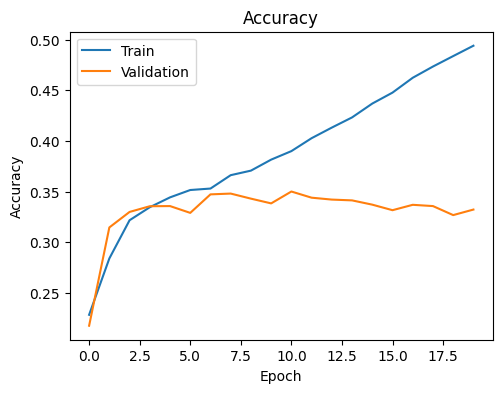

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

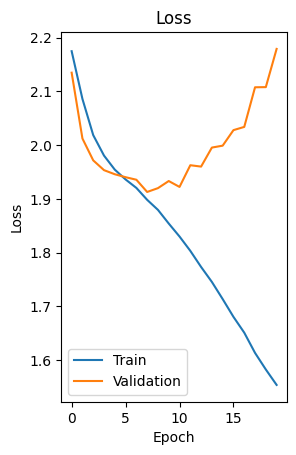

In [ ]:
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()